In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

from matplotlib.pyplot import grid, xticks, show, ylabel, xlabel, title, hist, bar, legend
from numpy import random, argmax, array, mean, arange
from scipy.stats import binom

# Exercise 1

Beispiel - Generieren von zufa ̈lligen Werten der ZG: X ∼ 0 - 0.4, 1 - 0.1, 2 - 0.3, 3 - 0.2 . Simulation von
zufalligen Werten fur X in Python:

In [3]:
#A1 Simulation  zufallige  Werte  fur X
N = 3
x=[0 ,1 ,3 ,5]
P=[0.4 ,0.1 ,0.3 ,0.2]
rng = np.random.default_rng() 
r=rng.choice(x, size=N , replace=True, p=P) 
print(r)

[5 0 0]


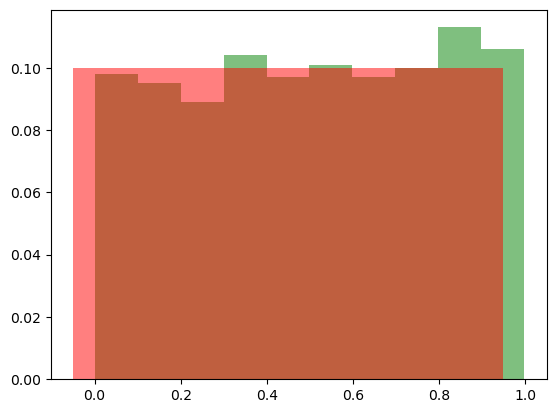

In [8]:

X = np.random.rand(1000)

rel_freq, bins = np.histogram(X, bins=10, density=True)

plt.hist(X, bins, weights=np.ones(len(X)) / len(X), alpha=0.5, color='g')

theoretical_prob = np.ones(10) / 10

plt.bar(bins[:-1], theoretical_prob, width=np.diff(bins), alpha=0.5, color='r')

plt.show()

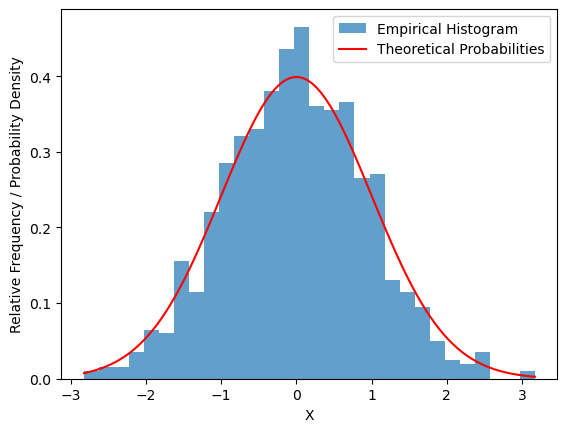

In [10]:
import numpy as np
import matplotlib.pyplot as plt


random_values = np.random.normal(size=1000)

plt.hist(random_values, bins=30, density=True, alpha=0.7, label='Empirical Histogram')


x = np.linspace(min(random_values), max(random_values), 100)
theoretical_probs = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

plt.plot(x, theoretical_probs, label='Theoretical Probabilities', color='red')

plt.xlabel('X')
plt.ylabel('Relative Frequency / Probability Density')
plt.legend()

plt.show()

# Exercise 2

Uber die Zufallsgröße X= Anzahl von Fehlern in den online Artikeln einer bestimmten Zeitung ist bekannt: in 25% der Artikeln sind keine Tippfehler, in 35% der Artikel ist ein Tippfehler, in 25% der Artikel sind zwei, in 10% drei und auf dem Rest vier Tippfehler.
 - Man generiere zufallige Werte fur X.
 - Man scha ̈tze anhand der Simulationen die Wahrscheinlichkeit, dass ho ̈chstens 1 Tippfehler in einem zufallig gewahlten Artikel auftaucht.
 - Wie viele Tippfehler sind durchschnittlich (im Mittel) in einem online Artikel dieser Zeitung zu erwarten, d.h. man verlangt die Schatzung von dem Erwartungswert E(X). Man berechne den theoretischen Erwartungswert.


In [15]:
probabilities = [0.25, 0.35, 0.25, 0.1, 0.05]

print(probabilities)

num_simulations = 10000

simulated_value = np.random.choice([0, 1, 2, 3, 4], size=num_simulations, p=probabilities)

probabilityAtMostOneError = np.mean(simulated_value <= 1)

simulatedExpectedValue = np.mean(simulated_value)

theoreticalExpectedValue = np.dot(np.array(5), probabilities)

print('Probability of at most one error: ', probabilityAtMostOneError)
print('Simulated Expected Value: ', simulatedExpectedValue)
print('Theoretical Expected Value: ', theoreticalExpectedValue)

[0.25, 0.35, 0.25, 0.1, 0.05]
Probability of at most one error:  0.6053
Simulated Expected Value:  1.3464
Theoretical Expected Value:  [1.25 1.75 1.25 0.5  0.25]


# Exercise 3

Gegeben sind n, N ∈ N∗, p ∈ (0, 1).Die Zufallsgro ̈ße X hat binomiale Verteilung X ∼ Bino(n, p), wenn P(X=k)=Cnkpk(1−p)n−k, k∈{0,...,n}.
 - Man generiere N (z.B. 500,1000,...) Werte der Zufallsgroße X mit binomialer Verteilung X ∼ Bino(n, p) mit n=8,p=0.5.Manbenutzehierfu ̈rscipy.stats.binom.rvs.
 - Man erstelle das Histogramm der relativen Ha ̈ufigkeiten der zufa ̈lligen Werten von X. Auf demselben Bild zeichne man auch die Balken fu ̈r die theoretischen Wahrscheinlichkeiten, fu ̈r diese benutze man scipy.stats.binom.pmf.
Hinweis:scipy.stats.binom.pmf(k,n,p)berechnetP(X=k)=Cnkpk(1−p)n−k, wennk∈{0,...,n}.

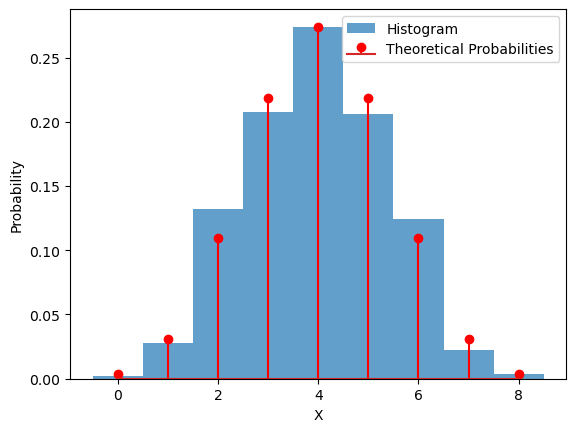

In [4]:
n = 8

p = 0.5

N = 500

random_values = binom.rvs(n, p, size=N)

plt.hist (random_values, bins = np.arange(-0.5, n+1.5, 1), density=True, alpha=0.7, label='Histogram')

x = np.arange(0, n+1)
theoretical_probs = binom.pmf(x, n, p)

plt.stem(x, theoretical_probs, linefmt='r-', markerfmt='ro', label='Theoretical Probabilities')

plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.show()

# Exercise 4

In einem Computerpool sind 7 Rechner. Die Wahrscheinlichkeit, dass ein neuer Virus einen Rechner angreift ist 0.4, unabhangig von anderen Rechnern.
 Welche ist die Wahrscheinlichkeit, dass der Virus:
 - a) hochstens 3 Rechner;
 - b) mindestens 4 Rechner;
 - c) genau 4 Rechner angreift?
Man gebe die Antworten anhand Simulationen (binom.rvs) und vergleiche diese mit den theoretischen Wahrscheinlichkeiten (hierfur benutze man binom.cdf, binom.pmf).
Wahrscheinlichkeiten bei einer diskreten Zufallsvariablen X mit Verteilungsfunktion F:R→[0,1],F(x)=P(X≤x)􏰃−→binom.cdf(x,n,p)􏰃−→für die binomiale Verteilung

a) Simulated Probability (at most 3 computers): 0.7085, Theoretical Probability: 0.7102
b) Simulated Probability (at least 4 computers): 0.2915, Theoretical Probability: 0.2898
c) Simulated Probability (exactly 4 computers): 0.1960, Theoretical Probability: 0.1935


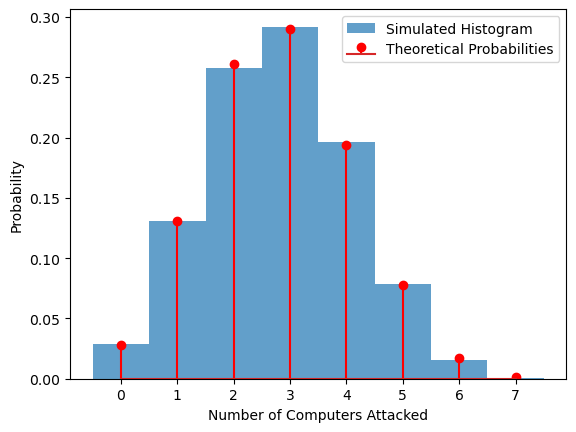

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


n_recomputers = 7  
p_virus_attack = 0.4  

N = 10000  
simulated_values = binom.rvs(n_recomputers, p_virus_attack, size=N)

simulated_prob_a = np.mean(simulated_values <= 3)
theoretical_prob_a = binom.cdf(3, n_recomputers, p_virus_attack)

simulated_prob_b = np.mean(simulated_values >= 4)
theoretical_prob_b = 1 - binom.cdf(3, n_recomputers, p_virus_attack)

simulated_prob_c = np.mean(simulated_values == 4)
theoretical_prob_c = binom.pmf(4, n_recomputers, p_virus_attack)


print(f"a) Simulated Probability (at most 3 computers): {simulated_prob_a:.4f}, Theoretical Probability: {theoretical_prob_a:.4f}")
print(f"b) Simulated Probability (at least 4 computers): {simulated_prob_b:.4f}, Theoretical Probability: {theoretical_prob_b:.4f}")
print(f"c) Simulated Probability (exactly 4 computers): {simulated_prob_c:.4f}, Theoretical Probability: {theoretical_prob_c:.4f}")

plt.hist(simulated_values, bins=np.arange(-0.5, n_recomputers+1.5, 1), density=True, alpha=0.7, label='Simulated Histogram')

x = np.arange(0, n_recomputers+1)
theoretical_probs = binom.pmf(x, n_recomputers, p_virus_attack)
plt.stem(x, theoretical_probs, linefmt='r-', markerfmt='ro', label='Theoretical Probabilities')

plt.xlabel('Number of Computers Attacked')
plt.ylabel('Probability')
plt.legend()

plt.show()


# Exercise 5

 Ein Zufallsgenerator generiert Zufallszahlen fur die Verteilung Unid(5), d.h.
 U ∼ Unid(5) ⇐⇒ U ∼ 1 2 ... 5
                    1/5 1/5 ...1/5

Sei X die Anzahl der generierten Zahlen, bevor die erste 5 auftaucht.
 - Man generiere N (z.B. 500,1000,...) zufallige Werte fur X und zeichne das Histogramm der relativen Haufigkeiten.  
 - Man schatze zusatzlich P(X ≤ 3), P(X > 3) und den Erwartungswert E(X).

Probability that X <= 3: 0.7550
Probability that X > 3: 0.2450
Expected Value of X: 2.4710


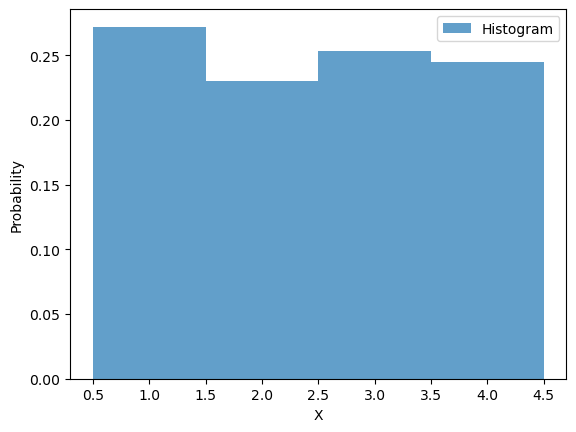

In [26]:
low = 1
high = 5

N = 1000

randomValues = np.random.randint(low, high, size=N)

plt.hist(randomValues, bins=np.arange(low-0.5, high+0.5, 1), density=True, alpha=0.7, label='Histogram')

probabilityXleq3 = np.mean(randomValues <= 3)
probabilityXgt3 = np.mean(randomValues > 3)
expectedValueX = np.mean(randomValues)

print(f'Probability that X <= 3: {probabilityXleq3:.4f}')
print(f'Probability that X > 3: {probabilityXgt3:.4f}')
print(f'Expected Value of X: {expectedValueX:.4f}')

plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.show()

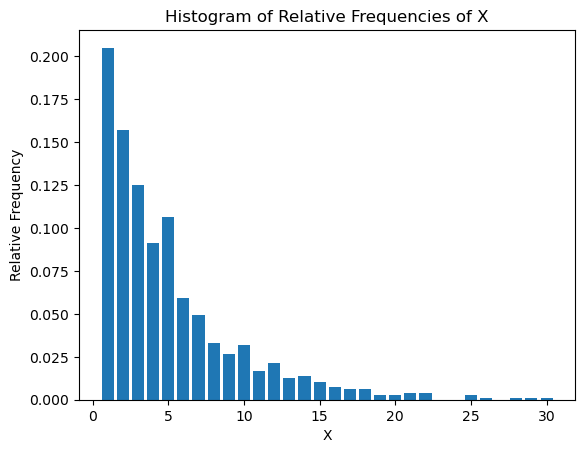

P(X ≤ 3): 0.595
P(X ≤ 3): 0.595
P(X > 3): 0.405
Expected value of X: 4.009


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
N = 1000

# Function to generate a random value for X
def generate_X():
    count = 0
    while np.random.choice([1, 2, 3, 4, 5]) != 5:
        count += 1
    return count

# Generate N random values for X
X = [generate_X() for _ in range(N)]

# Draw the histogram of the relative frequencies
plt.hist(X, bins=range(1, max(X)+2), density=True, align='left', rwidth=0.8)
plt.xlabel('X')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequencies of X')
plt.show()

# Estimate P(X ≤ 3)
p_X_le_3 = len([x for x in X if x <= 3]) / N
p_X_le_3_2 = np.mean([x <= 3 for x in X])
print(f"P(X ≤ 3): {p_X_le_3}")
print(f"P(X ≤ 3): {p_X_le_3_2}")

# Estimate P(X > 3)
p_X_gt_3 = len([x for x in X if x > 3]) / N
print(f"P(X > 3): {p_X_gt_3}")

# Estimate the expected value of X
expected_value = np.mean(X)
print(f"Expected value of X: {expected_value}")

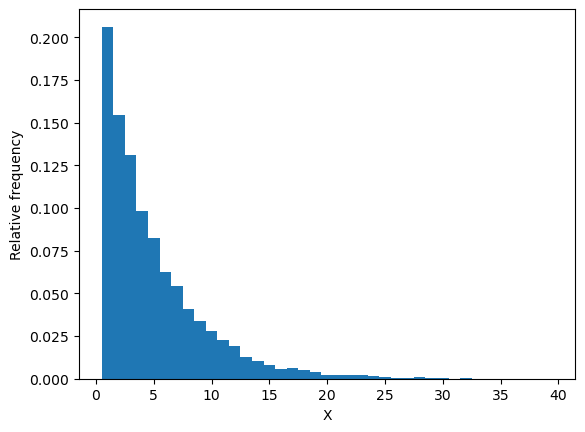

P(X ≤ 3) = 0.4915
P(X > 3) = 0.5085
E(X) = 5.0016


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the possible outcomes of the random generator
outcomes = [1, 2, 3, 4, 5]

# Define the number of simulations
N = 10000

# Initialize a list to store the values of X
X_values = []

# Run the simulations
for _ in range(N):
    X = 1
    while np.random.choice(outcomes) != 5:
        X += 1
    X_values.append(X)

# Plot the histogram of the relative frequencies
plt.hist(X_values, bins=range(1, max(X_values)+2), align='left', density=True)
plt.xlabel('X')
plt.ylabel('Relative frequency')
plt.show()

# Estimate the probabilities and the expected value
P_X_leq_3 = sum(X <= 3 for X in X_values) / N
P_X_gt_3 = sum(X > 3 for X in X_values) / N
E_X = sum(X_values) / N

print(f"P(X ≤ 3) = {P_X_leq_3}")
print(f"P(X > 3) = {P_X_gt_3}")
print(f"E(X) = {E_X}")

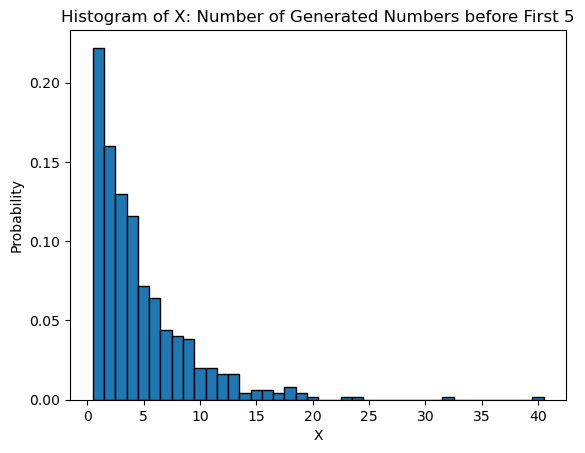

Estimated Probability P(X <= 3): 0.512
Estimated Probability P(X > 3): 0.488
Estimated Expectation E(X): 4.738


In [5]:
'''
Code from Cata
'''

def ex5():
    # Anzahl der Simulationen
    num_simulations = 500

    results = []
    for _ in range(num_simulations):
        generated_numbers = random.choice(arange(1, 6), size=1000, p=[1 / 5] * 5)
        # Suche nach der Position der ersten 5 in den generierten Zahlen
        first_occurrence_index = argmax(generated_numbers == 5)
        # Anzahl der generierten Zahlen vor der ersten 5
        x = first_occurrence_index + 1
        results.append(x)

    hist(results, bins=arange(1, max(results) + 2) - 0.5, density=True, edgecolor='black')
    title('Histogram of X: Number of Generated Numbers before First 5')
    xlabel('X')
    ylabel('Probability')
    show()

    # P(X ≤ 3)
    probability_x_leq_3 = mean(array(results) <= 3)
    # P(X > 3)
    probability_x_gt_3 = mean(array(results) > 3)
    # Erwartungswert E(X)
    expectation_x = mean(results)
    # Schätzung durchführen
    # Ergebnisse ausgeben
    print(f"Estimated Probability P(X <= 3): {probability_x_leq_3}")
    print(f"Estimated Probability P(X > 3): {probability_x_gt_3}")
    print(f"Estimated Expectation E(X): {expectation_x}")

ex5()

# Exercise 6

Eine Urne enthalt 5 Kugeln mit der Ziffer 1, 6 Kugeln mit der Ziffer 2, 9 Kugeln mit der Ziffer 3. Aus der Urne werden 2 Kugeln ohne Zurucklegen gezogen. X sei die Summe der beiden Kugeln.
- Man generiere N (z.B. 500,1000,...) zufallige Werte fur X und zeichne das Histogramm der relativen Haufigkeiten. Auf demselben Bild zeichne man auch die Balken fu ̈r die theoretischen Wahrscheinlichkeiten.
- Man schatze zusatzlich den Erwartungswert E(X) und berechne den theoretischen Erwartungswert von X.

[1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3]
Expected Value of X: 4.3990
Theoretical Expected Value of X: 1.5000


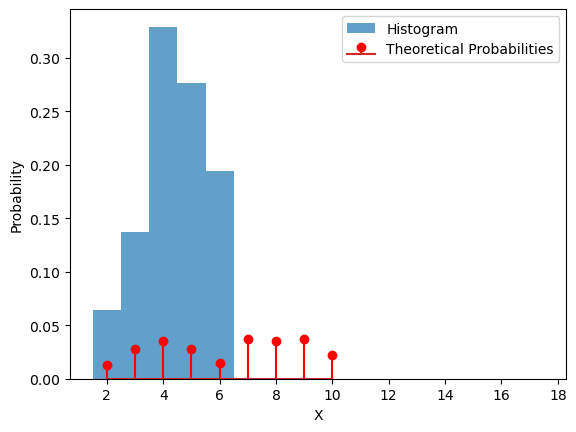

In [32]:
kugelnZiffer1 = 5
kugelnZiffer2 = 6
kugelnZiffer3 = 9

N= 1000

sample_space = np.concatenate([np.full(kugelnZiffer1, 1), 
                               np.full(kugelnZiffer2, 2), 
                               np.full(kugelnZiffer3, 3)
                               ])
print(sample_space)

randomValues = np.random.choice(sample_space, size=(N, 2)).sum(axis=1)

plt.hist(randomValues, bins=np.arange(1.5, 18.5, 1), density=True, alpha=0.7, label='Histogram')

theoretical_probs = [np.sum(np.isin(sample_space, [i, j])) / len(sample_space)**2 for i in range(1, 4) for j in range(1, 4)]

plt.stem(range(2, 11), theoretical_probs, linefmt='r-', markerfmt='ro', label='Theoretical Probabilities')


expectedValueX = np.mean(randomValues)

theoreticalExpectedValue = np.sum([i * j for i in range(1, 4) for j in theoretical_probs])

print(f'Expected Value of X: {expectedValueX:.4f}')
print(f'Theoretical Expected Value of X: {theoreticalExpectedValue:.4f}')

plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.show()

# Exercise 6

Eine Urne enthalt 5 Kugeln mit der Ziffer 1, 6 Kugeln mit der Ziffer 2, 9 Kugeln mit der Ziffer 3. Aus der Urne werden 2 Kugeln ohne Zurucklegen gezogen. X sei die Summe der beiden Kugeln.
Man generiere N (z.B. 500,1000,...) zufallige Werte fur X und zeichne das Histogramm der relativen Haufigkeiten. Auf demselben Bild zeichne man auch die Balken fu ̈r die theoretischen Wahrscheinlichkeiten. Man schatze zusatzlich den Erwartungswert E(X) und berechne den theoretischen Erwartungswert von X.

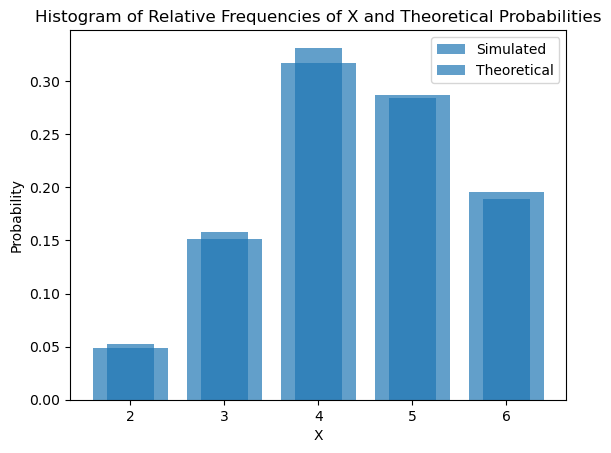

Expected value of X: 4.43
Theoretical expected value of X: 4.463157894736842


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
N = 1000

# Balls in the urn
balls = [1]*5 + [2]*6 + [3]*9

# Function to generate a random value for X
def generate_X():
    drawn_balls = np.random.choice(balls, size=2, replace=False)
    return np.sum(drawn_balls)

# Generate N random values for X
X = [generate_X() for _ in range(N)]

# Theoretical probabilities
theoretical_probs = {2: 5/20*4/19, 3: (5/20*6/19 + 6/20*5/19), 4: (5/20*9/19 + 6/20*6/19 + 9/20*5/19), 
                     5: (6/20*9/19 + 9/20*6/19), 6: 9/20*8/19}

# Draw the histogram of the relative frequencies
plt.hist(X, bins=range(2, 8), density=True, align='left', rwidth=0.8, alpha=0.7, label='Simulated')

# Draw the bars for the theoretical probabilities
plt.bar(theoretical_probs.keys(), theoretical_probs.values(), align='center', width=0.5, alpha=0.7, label='Theoretical')

plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Histogram of Relative Frequencies of X and Theoretical Probabilities')
plt.legend()
plt.show()

# Estimate the expected value of X
expected_value = np.mean(X)
print(f"Expected value of X: {expected_value}")

# Calculate the theoretical expected value of X
theoretical_expected_value = sum(x*p for x, p in theoretical_probs.items())
print(f"Theoretical expected value of X: {theoretical_expected_value}")

X = 0: 68
X = 1: 365
X = 2: 742
X = 3: 616
X = 4: 209


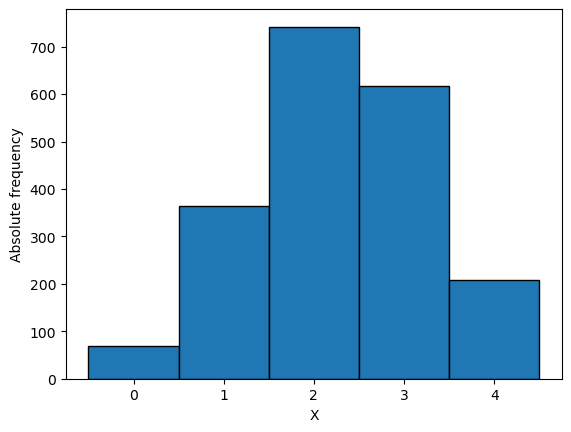

P(X = 0) = 0.034
Theoretical P(X = 0) = 0.033735943356934604
Total number of permutations: 24


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# a)
# Define the possible outcomes
outcomes = [2, 3, 4, 5, 6, 7, 8]

# Define the number of simulations
N = 2000

# Initialize a list to store the values of X
X_values = []

# Run the simulations
for _ in range(N):
    # Draw 4 numbers with replacement
    draws = np.random.choice(outcomes, size=4, replace=True)
    # Count the even numbers
    X = sum(draw % 2 == 0 for draw in draws)
    X_values.append(X)

# Count the absolute frequencies of each possible value of X
X_values_counts = np.bincount(X_values)

# Print each possible value of X and the corresponding absolute frequency
for X, count in enumerate(X_values_counts):
    print(f"X = {X}: {count}")

# b)
# Plot the histogram of the absolute frequencies
plt.hist(X_values, bins=np.arange(6)-0.5, edgecolor='black')
plt.xlabel('X')
plt.ylabel('Absolute frequency')
plt.xticks(range(5))
plt.show()

# c)
# Estimate the probability P(X = 0)
P_X_0 = X_values_counts[0] / N
print(f"P(X = 0) = {P_X_0}")

# The theoretical value of P(X = 0) is (3/7)^4
P_X_0_theoretical = (3/7)**4
print(f"Theoretical P(X = 0) = {P_X_0_theoretical}")

# d)
# Generate all permutations of the numbers 2, 3, 4, 5
perms = list(permutations([2, 3, 4, 5]))

# Print the total number of permutations
print(f"Total number of permutations: {len(perms)}")